# eFEL Metric

In [1]:
import pandas as pd
import numpy as np

In [2]:
from brian2 import *
prefs.codegen.target = 'cython'  # weave is not multiprocess-safe!


In [3]:
import matplotlib.pyplot as plt

import efel

### Load Input and Output

In [4]:
df_inp_traces = pd.read_csv('input_traces_hh.csv')
df_out_traces = pd.read_csv('output_traces_hh.csv')

In [5]:
out_traces0 = df_out_traces.to_numpy()
out_traces0 = out_traces0[:4, 1:]
out_traces0

array([[-63.54211145, -65.52491616, -62.90054542, ..., -81.5252667 ,
        -82.30107475, -82.04870895],
       [-63.78548155, -64.75587972, -64.60550311, ..., -64.42127691,
        -65.13069593, -64.48718384],
       [-62.92648395, -65.82540807, -64.76394825, ..., -64.9418292 ,
        -63.8704734 , -63.17105741],
       [-64.51645049, -66.84945425, -64.64260378, ..., -80.91299455,
        -79.08977935, -82.01562544]])

In [6]:
inp_traces0 = df_inp_traces.to_numpy()
inp_traces0 = inp_traces0[:4, 1:]
inp_traces0

array([[0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [2.e-09, 2.e-09, 2.e-09, ..., 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00]])

## Generate the Data

In [7]:
# Parameters
area = 20000*umetre**2
Cm = 1*ufarad*cm**-2 * area
El = -65*mV
EK = -90*mV
ENa = 50*mV
VT = -63*mV
params_correct = {'gl': float(10e-5*siemens*cm**-2 * area),
                  'g_na': float(200*msiemens*cm**-2 * area),
                  'g_kd': float(55*msiemens*cm**-2 * area)}

dt = 0.01*ms

In [8]:
# Generate a step-current input and an "experimental" voltage trace
input_current0 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA*10
input_current1 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA*2
input_current2 = np.hstack([np.ones(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA*2
input_current3 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA*50
input_current4 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA*0.2

input_current = np.stack((input_current0, input_current1, input_current2, input_current3, input_current4))

In [9]:
defaultclock.dt = dt

In [10]:
# The model
eqsHH = Equations('''
dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I(t))/Cm : volt
dm/dt = 0.32*(mV**-1)*(13.*mV-v+ VT)/
    (exp((13.*mV-v+VT)/(4.*mV))-1.)/ms*(1-m)-0.28*(mV**-1)*(v-VT-40.*mV)/
    (exp((v-VT-40.*mV)/(5.*mV))-1.)/ms*m : 1
dn/dt = 0.032*(mV**-1)*(15.*mV-v+VT)/
    (exp((15.*mV-v+VT)/(5.*mV))-1.)/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
g_na : siemens (constant)
g_kd : siemens (constant)
gl   : siemens (constant)
''')

In [11]:
I = TimedArray(input_current0, dt=dt)

G = NeuronGroup(1, eqsHH, method='exponential_euler')
G.v = El
G.set_states(params_correct, units=False)
mon = StateMonitor(G, 'v', record=0)
run(20*ms)

voltage = mon.v[0]/mV
voltage += np.random.randn(len(voltage))


inp_trace0 = np.array([input_current0])
n0, n1 = inp_trace0.shape

out_trace0 = np.array(voltage[:n1])

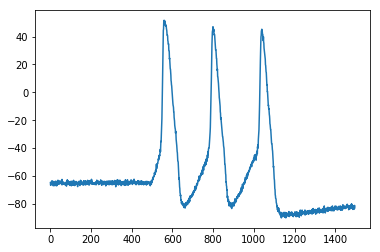

In [12]:
plot(out_trace0);

In [13]:
start_scope()
I = TimedArray(input_current1, dt=dt)
G = NeuronGroup(1, eqsHH, method='exponential_euler')
G.v = El
G.set_states(params_correct, units=False)
mon = StateMonitor(G, 'v', record=0)

run(20*ms)

voltage = mon.v[0]/mV

voltage += np.random.randn(len(voltage))
inp_trace1 = np.array([input_current1])
n0, n1 = inp_trace1.shape
out_trace1 = np.array(voltage[:n1])

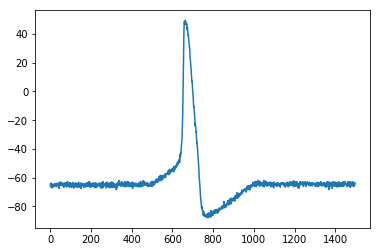

In [14]:
plot(out_trace1);

In [15]:
start_scope()
I = TimedArray(input_current2, dt=dt)
G = NeuronGroup(1, eqsHH, method='exponential_euler')
G.v = El
G.set_states(params_correct, units=False)
mon = StateMonitor(G, 'v', record=0)

run(20*ms)

voltage = mon.v[0]/mV

voltage += np.random.randn(len(voltage))
inp_trace2 = np.array([input_current2])
n0, n1 = inp_trace2.shape
out_trace2 = np.array(voltage[:n1])

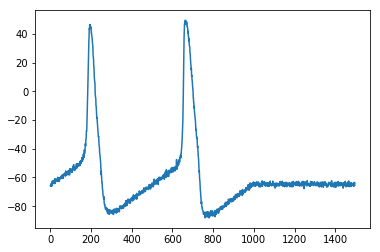

In [16]:
plot(out_trace2);

In [17]:
start_scope()
I = TimedArray(input_current3, dt=dt)
G = NeuronGroup(1, eqsHH, method='exponential_euler')
G.v = El
G.set_states(params_correct, units=False)
mon = StateMonitor(G, 'v', record=0)

run(30*ms)

voltage = mon.v[0]/mV

voltage += np.random.randn(len(voltage))
inp_trace3 = np.array([input_current3])
n0, n1 = inp_trace3.shape
out_trace3 = np.array(voltage[:n1])

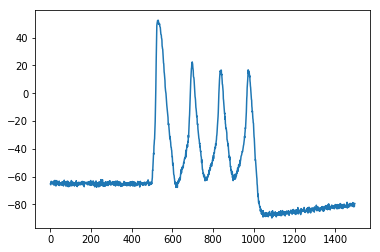

In [18]:
plot(out_trace3);

In [19]:
start_scope()
I = TimedArray(input_current4, dt=dt)
G = NeuronGroup(1, eqsHH, method='exponential_euler')
G.v = El
G.set_states(params_correct, units=False)
mon = StateMonitor(G, 'v', record=0)

run(30*ms)

voltage = mon.v[0]/mV

voltage += np.random.randn(len(voltage))
inp_trace4 = np.array([input_current4])
n0, n1 = inp_trace4.shape
out_trace4 = np.array(voltage[:n1])

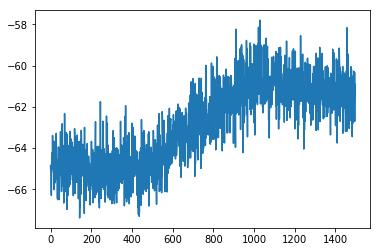

In [20]:
plot(out_trace4);

In [21]:
inp_traces = np.stack((inp_trace0[0], inp_trace1[0], inp_trace2[0], inp_trace3[0], inp_trace4[0]))
np.shape(inp_traces)

(5, 1497)

In [22]:
out_traces = np.stack((out_trace0, out_trace1, out_trace2, out_trace3, out_trace4))
np.shape(out_traces)

(5, 1497)

## Visualize all the Traces

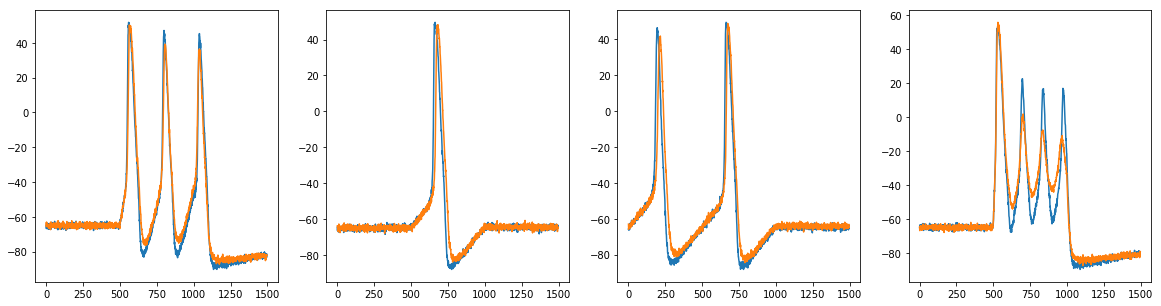

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
ax[0].plot(out_traces[0])
ax[1].plot(out_traces[1])
ax[2].plot(out_traces[2])
ax[3].plot(out_traces[3])

ax[0].plot(out_traces0[0])
ax[1].plot(out_traces0[1])
ax[2].plot(out_traces0[2])
ax[3].plot(out_traces0[3]);


## Work with eFEL Metric

In [24]:
inp_times = [[50,100], [50,100], [0,100], [50,100], [50,100]]
inp_times

[[50, 100], [50, 100], [0, 100], [50, 100], [50, 100]]

In [25]:
fl = ['AP_amplitude', 'peak_time', 'peak_voltage', 'AP_begin_time', 'AP_begin_width', 
                                                 'AP_begin_voltage']


In [26]:
def calculate_features(traces, inp_times, feat_list):
    traces_list = []
    
    for i, trace in enumerate(traces):
        time = np.arange(0, len(trace)/10, 0.1)
        temp_trace = {}
        temp_trace['T'] = time
        temp_trace['V'] = trace
        temp_trace['stim_start'] = [inp_times[i][0]]
        temp_trace['stim_end'] = [inp_times[i][1]]
        traces_list.append(temp_trace)

    results = efel.getFeatureValues(traces_list, feat_list)

    return results

In [27]:
calculate_features(out_traces[:3], inp_times, fl)

[{'AP_amplitude': array([94.31530129, 86.88273182]),
  'peak_time': array([ 55.9,  79.9, 103.9]),
  'peak_voltage': array([51.74202131, 47.0814906 , 45.28956414]),
  'AP_begin_time': array([ 54.1,  78. , 102.1]),
  'AP_begin_width': array([2.1, 2.5, 7. ]),
  'AP_begin_voltage': array([-42.57327998, -39.80124122, -39.27979987])},
 {'AP_amplitude': array([92.56622988]),
  'peak_time': array([66.3]),
  'peak_voltage': array([49.5985107]),
  'AP_begin_time': array([64.2]),
  'AP_begin_width': array([2.4]),
  'AP_begin_voltage': array([-42.96771918])},
 {'AP_amplitude': array([87.75561338, 92.6490248 ]),
  'peak_time': array([19.5, 66.2]),
  'peak_voltage': array([46.49983749, 49.46546043]),
  'AP_begin_time': array([16.9, 64.2]),
  'AP_begin_width': array([7.3, 2.3]),
  'AP_begin_voltage': array([-41.25577589, -43.18356436])}]

In [28]:
inp_times = [[50,100], [50,100], [0,100], [50,100]]
inp_times

[[50, 100], [50, 100], [0, 100], [50, 100]]

In [29]:
out_traces = np.stack((out_trace0, out_trace1, out_trace2, out_trace3))
np.shape(out_traces)

(4, 1497)

In [30]:
D2 = calculate_features(out_traces, inp_times, fl)
D2

[{'AP_amplitude': array([94.31530129, 86.88273182]),
  'peak_time': array([ 55.9,  79.9, 103.9]),
  'peak_voltage': array([51.74202131, 47.0814906 , 45.28956414]),
  'AP_begin_time': array([ 54.1,  78. , 102.1]),
  'AP_begin_width': array([2.1, 2.5, 7. ]),
  'AP_begin_voltage': array([-42.57327998, -39.80124122, -39.27979987])},
 {'AP_amplitude': array([92.56622988]),
  'peak_time': array([66.3]),
  'peak_voltage': array([49.5985107]),
  'AP_begin_time': array([64.2]),
  'AP_begin_width': array([2.4]),
  'AP_begin_voltage': array([-42.96771918])},
 {'AP_amplitude': array([87.75561338, 92.6490248 ]),
  'peak_time': array([19.5, 66.2]),
  'peak_voltage': array([46.49983749, 49.46546043]),
  'AP_begin_time': array([16.9, 64.2]),
  'AP_begin_width': array([7.3, 2.3]),
  'AP_begin_voltage': array([-41.25577589, -43.18356436])},
 {'AP_amplitude': array([115.46018729,  64.51773182,  52.29994444,  52.63187117]),
  'peak_time': array([53. , 69.7, 84. , 97.2]),
  'peak_voltage': array([52.500858

In [31]:
D1 = calculate_features(out_traces0, inp_times, fl)
D1

WARNING    /home/alteska/.local/lib/python3.7/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature AP_amplitude: AP_amplitude: More peak_voltage entries during the stimulus than AP_begin_indices entries
  RuntimeWarning)
 [py.warnings]
WARNING    /home/alteska/.local/lib/python3.7/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature AP_begin_width: 
  RuntimeWarning)
 [py.warnings]


[{'AP_amplitude': array([89.70820756, 78.49048023]),
  'peak_time': array([ 56.4,  80.7, 103.9]),
  'peak_voltage': array([50.21736542, 39.21906422, 36.45744931]),
  'AP_begin_time': array([ 54.5,  78. , 101.3]),
  'AP_begin_width': array([2.1, 7.5, 2.8]),
  'AP_begin_voltage': array([-39.49084214, -39.271416  , -38.86994408])},
 {'AP_amplitude': array([85.66269442]),
  'peak_time': array([68.2]),
  'peak_voltage': array([48.24698601]),
  'AP_begin_time': array([65.8]),
  'AP_begin_width': array([2.6]),
  'AP_begin_voltage': array([-37.41570842])},
 {'AP_amplitude': array([79.69039806, 85.78382778]),
  'peak_time': array([21.6, 67.4]),
  'peak_voltage': array([41.84420173, 48.81932811]),
  'AP_begin_time': array([18.5, 65.4]),
  'AP_begin_width': array([7.3, 2.1]),
  'AP_begin_voltage': array([-37.84619633, -36.96449967])},
 {'AP_amplitude': None,
  'peak_time': array([53.1, 70.2, 83.5, 96.7, 97.9]),
  'peak_voltage': array([ 55.6396844 ,   1.75910505,  -7.64620089, -10.95648429,
     

In [32]:
out_traces

array([[-64.79882258, -66.66770234, -65.29653551, ..., -81.94695148,
        -81.15154725, -82.91535573],
       [-64.51397501, -66.43218952, -64.59132464, ..., -64.52895285,
        -63.33115412, -64.55155348],
       [-65.75413075, -66.12261607, -65.08207073, ..., -64.29359679,
        -63.45619133, -65.29420386],
       [-65.23462425, -65.74920077, -65.84398545, ..., -81.42569736,
        -79.44231743, -79.2839368 ]])

In [33]:
OT = np.vstack((out_traces, out_traces, out_traces0))
np.shape(OT)

(12, 1497)

In [34]:
out_traces0

array([[-63.54211145, -65.52491616, -62.90054542, ..., -81.5252667 ,
        -82.30107475, -82.04870895],
       [-63.78548155, -64.75587972, -64.60550311, ..., -64.42127691,
        -65.13069593, -64.48718384],
       [-62.92648395, -65.82540807, -64.76394825, ..., -64.9418292 ,
        -63.8704734 , -63.17105741],
       [-64.51645049, -66.84945425, -64.64260378, ..., -80.91299455,
        -79.08977935, -82.01562544]])

## Calculate Features and Errors

In [35]:
def calculate_features(traces, inp_times, feat_list):
    traces_list = []
    
    for i, trace in enumerate(traces):
        time = np.arange(0, len(trace)/10, 0.1)
        temp_trace = {}
        temp_trace['T'] = time
        temp_trace['V'] = trace
        temp_trace['stim_start'] = [inp_times[i][0]]
        temp_trace['stim_end'] = [inp_times[i][1]]
        traces_list.append(temp_trace)

    results = efel.getFeatureValues(traces_list, feat_list)

    return results

In [36]:
def mask_dict_none(my_dict):
    for key, value in my_dict.items():
        if value is None:
            my_dict[key] = 9999

In [37]:
def feat_to_err(d1, d2):
    
    d3 = {key: d1[key] - d2.get(key, 0) for key in d1.keys()}   
    err = 0

    for k, v in d3.items():
        err += np.abs(sum(v))
        
    return err

In [38]:
def feat_to_err2(D1, D2):
    errors = []
    for d1, d2 in zip(D1, D2):
        mask_dict_none(d1)
        mask_dict_none(d2)
        
        d3 = {key: d1[key] - d2.get(key, 0) for key in d1.keys()}   
        err = 0

        for k, v in d3.items():
            err += np.abs(sum(v))
        
        errors.append(err)
        
    return errors

In [39]:
# feat_to_err2(D1, D2)

In [40]:
inp_times = [[50,100], [50,100], [0,100], [50,100]]


In [41]:
def get_features(traces, output, n_traces):
        output = atleast_2d(output)
        out_feats = calculate_features(output, inp_times, fl)
        for of in out_feats:
            mask_dict_none(of)
        
        for i in arange(n_traces):
            temp_out = output[i]
            temp_traces = traces[i::n_traces]

            feats = calculate_features(temp_traces, inp_times, fl)
            
            for f in feats:
                mask_dict_none(f)
                
            print(feats[0], '\n')
            print(out_feats[0], '\n')
            errors = feat_to_err(out_feats[0], feats[0])
            print(errors, '\n')                        

In [42]:
get_features(OT, out_traces0, 4)

{'AP_amplitude': array([94.31530129, 86.88273182]), 'peak_time': array([ 55.9,  79.9, 103.9]), 'peak_voltage': array([51.74202131, 47.0814906 , 45.28956414]), 'AP_begin_time': array([ 54.1,  78. , 102.1]), 'AP_begin_width': array([2.1, 2.5, 7. ]), 'AP_begin_voltage': array([-42.57327998, -39.80124122, -39.27979987])} 

{'AP_amplitude': array([89.70820756, 78.49048023]), 'peak_time': array([ 56.4,  80.7, 103.9]), 'peak_voltage': array([50.21736542, 39.21906422, 36.45744931]), 'AP_begin_time': array([ 54.5,  78. , 101.3]), 'AP_begin_width': array([2.1, 7.5, 2.8]), 'AP_begin_voltage': array([-39.49084214, -39.271416  , -38.86994408])} 

37.74066124914977 

{'AP_amplitude': array([92.56622988]), 'peak_time': array([66.3]), 'peak_voltage': array([49.5985107]), 'AP_begin_time': array([64.2]), 'AP_begin_width': array([2.4]), 'AP_begin_voltage': array([-42.96771918])} 

{'AP_amplitude': array([89.70820756, 78.49048023]), 'peak_time': array([ 56.4,  80.7, 103.9]), 'peak_voltage': array([50.2173

ValueError: operands could not be broadcast together with shapes (3,) (2,) 